# Red Neuronal - 1 Sola Capa

```
model = Sequential([
    Dense(1, input_shape=(1,), activation="linear")
])
model.compile(optimizer="adam", loss="mse", metrics=['mae'])
````

esta una Red Neuronal Feedforward (Perceptrón de una sola capa)
—también llamada red neuronal completamente conectada o red densa.

⸻

🔹 Tipo de red

🔸 Tipo: Red Neuronal Artificial (ANN)
🔸 Subtipo: Red Feedforward (una sola capa)
🔸 Específicamente: Regresión lineal neuronal

⸻

🔹 Estructura del modelo

|Elemento	|Descripción|
|---|---|
|Dense(1)	|Capa totalmente conectada con 1 neurona|
|input_shape=(1,)	|La entrada es un solo valor (ej. temperatura en °C)|
|activation="linear"	|No se aplica activación → la salida es una función lineal|
|loss="mse"|	Se usa Error Cuadrático Medio, típico en regresión|
|optimizer="adam"|	Optimizador adaptativo, ajusta los pesos automáticamente|
|metrics=['mae']|	Métrica de error absoluto medio, también usada en regresión|


⸻

🔹 Qué hace realmente

Esta red aprende una relación lineal del tipo:

$$\hat{y} = w \cdot x + b$$

donde:

	•	w = peso aprendido por la neurona
	•	b = sesgo
	•	x = entrada
	•	ŷ = salida (predicción)

⸻

🔹 Ejemplo conceptual

Si entrenas este modelo con:

	•	Entrada (x): temperatura en °C
	•	Salida (y): temperatura en °F

La red aprenderá automáticamente la fórmula:

$$°F = 1.8 \cdot °C + 32$$

⸻

✅ En resumen

|Concepto|	Valor|
|---|---|
|Tipo de red|	Red neuronal Feedforward|
|Capa oculta|	Ninguna|
|Número de neuronas|	1|
|Activación|	Lineal|
|Tarea|	Regresión lineal (predicción de un valor continuo)|
|Ejemplo de uso|	°C → °F, salario → costo, peso → altura|


⸻

💡 En otras palabras:

Esta red es el equivalente a una regresión lineal simple,
pero implementada con una neurona dentro del marco de una red neuronal.

## 1-Layer

✅ Datos cargados correctamente
   - Conjunto de entrenamiento ('Train'): 80 muestras
   - Conjunto de prueba ('Test'): 21 muestras
✅ Modelo compilado correctamente


c:\Users\egarcia\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

   - Arquitectura: None

🚀 Iniciando entrenamiento...
Restoring model weights from the end of the best epoch: 1000.
✅ Entrenamiento completado
   - Épocas entrenadas: 1000

📊 RESULTADOS DEL MODELO
🔹 Peso aprendido (esperado ≈ 1.8): 0.883252
🔹 Sesgo aprendido (esperado ≈ 32): 2.747446
🔹 Error absoluto: 0.916748
🔹 Sesgo absoluto: 29.252554

📈 Métricas de rendimiento:
   MSE : 1570.074585
   RMSE: 39.624168
   MAE : 32.388157
   R²  : 0.429893


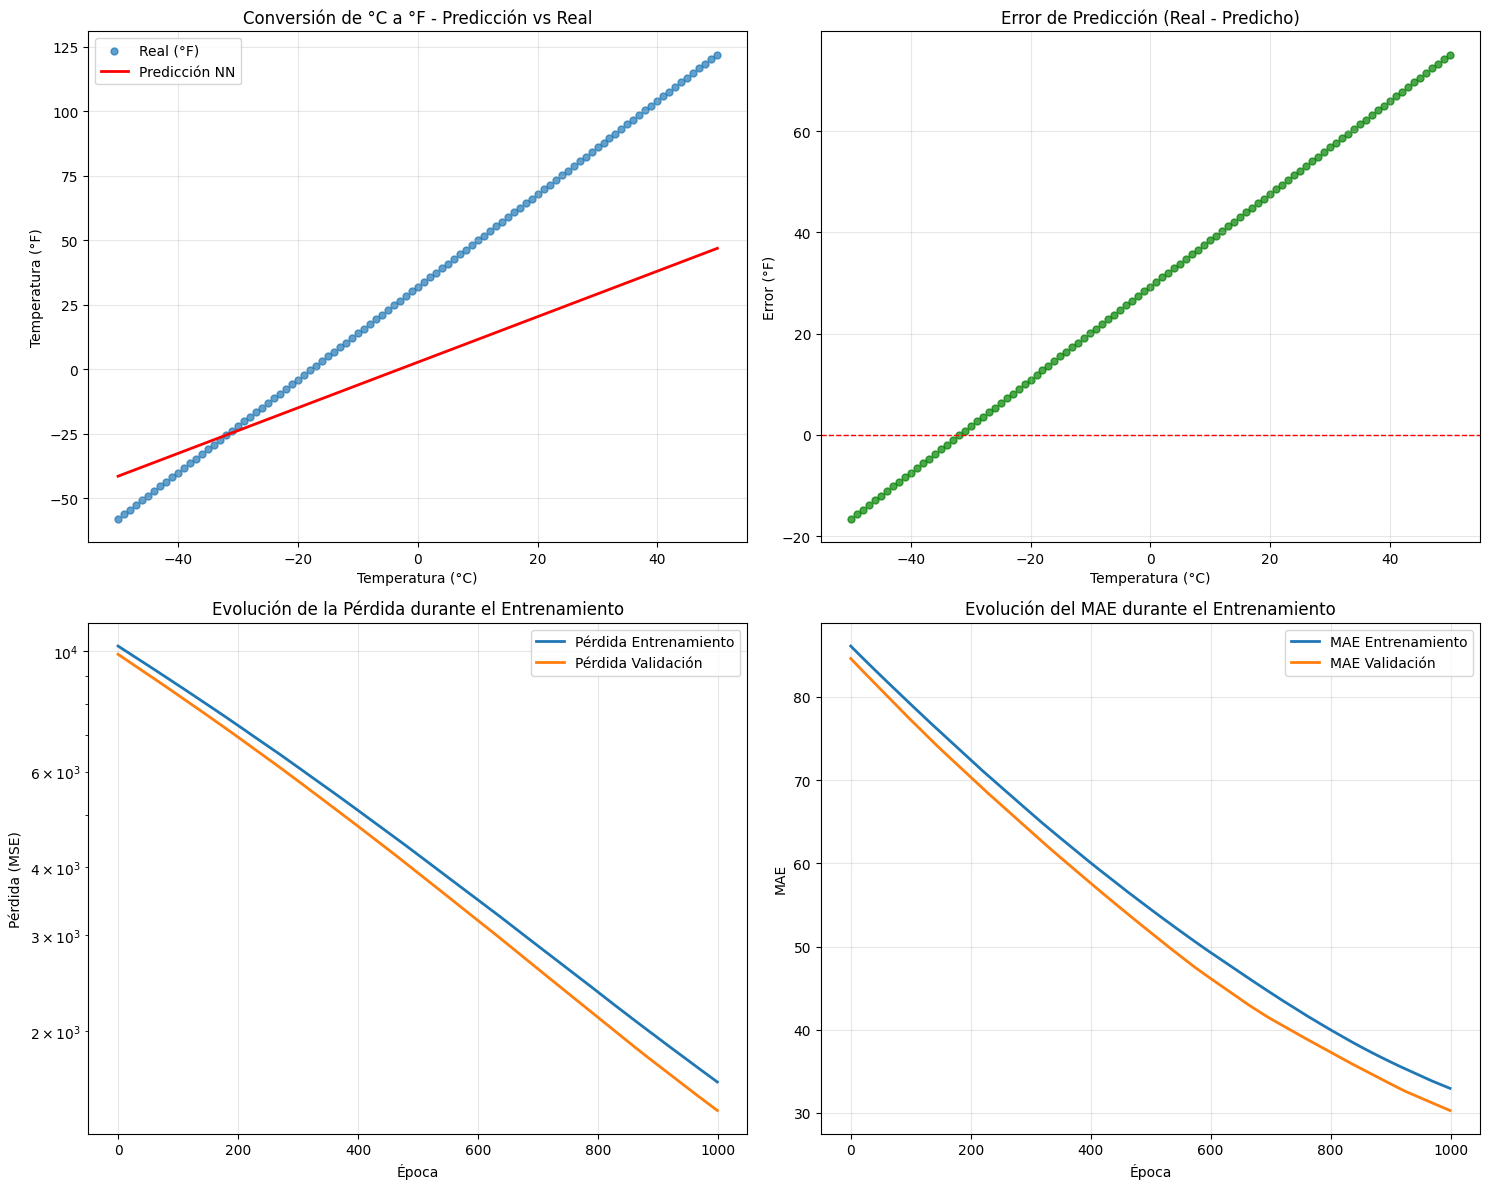


🧪 PRUEBAS DE PREDICCIÓN
🌡  C =  -40° → Predicho: -32.583°F | Real: -40.000°F | Error:  7.417°F
🌡  C =  -20° → Predicho: -14.918°F | Real:  -4.000°F | Error: 10.918°F
🌡  C =    0° → Predicho:   2.747°F | Real:  32.000°F | Error: 29.253°F
🌡  C =   25° → Predicho:  24.829°F | Real:  77.000°F | Error: 52.171°F
🌡  C =   37° → Predicho:  35.428°F | Real:  98.600°F | Error: 63.172°F
🌡  C =   50° → Predicho:  46.910°F | Real: 122.000°F | Error: 75.090°F
🌡  C =  100° → Predicho:  91.073°F | Real: 212.000°F | Error: 120.927°F

📏 Error máximo en pruebas: 120.927°F

🎯 ANÁLISIS FINAL
❌ El modelo necesita más ajuste
❌ Error en predicciones demasiado alto


In [ ]:
# ============================================================
# 🔥 Red Neuronal Mejorada para aprender °C → °F
# ============================================================

# !pip install tensorflow numpy scikit-learn matplotlib --quiet

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# ------------------------------------------------------------
# 1) Datos: °C de -50 a 50 y °F por fórmula
# ------------------------------------------------------------
try:
    X = np.linspace(-50, 50, 101).astype(np.float32).reshape(-1, 1)  # °C
    Y = (9/5)*X + 32                                                 # °F

    # División en entrenamiento y prueba
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    print(f"✅ Datos cargados correctamente")
    print(f"   - Conjunto de entrenamiento ('Train'): {X_train.shape[0]} muestras")
    print(f"   - Conjunto de prueba ('Test'): {X_test.shape[0]} muestras")

except Exception as e:
    print(f"❌ Error cargando datos: {e}")
    exit()

# ------------------------------------------------------------
# 2) Modelo: una neurona (y = w*x + b)
# ------------------------------------------------------------
try:
    model = Sequential([
        Dense(1, input_shape=(1,), activation="linear")
    ])
    model.compile(optimizer="adam", loss="mse", metrics=['mae'])

    print("✅ Modelo compilado correctamente")
    print(f"   - Arquitectura: {model.summary()}")

except Exception as e:
    print(f"❌ Error creando el modelo: {e}")
    exit()

# ------------------------------------------------------------
# 3) Callback de Early Stopping
# ------------------------------------------------------------
# Si el error llega al punto mas bajo pero luego empieza a subir entonces ahi se detiene), se detiene cuando encuentre la mejor solucion. Patience.
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=50,
    restore_best_weights=True,
    verbose=1,
    min_delta=0.001
)

# ------------------------------------------------------------
# 4) Entrenamiento con validación
# ------------------------------------------------------------
try:
    print("\n🚀 Iniciando entrenamiento...")
    history = model.fit(
        X_train, Y_train,
        validation_data=(X_test, Y_test),
        epochs=1000,
        verbose=0,
        callbacks=[early_stopping]
    )

    print("✅ Entrenamiento completado")
    print(f"   - Épocas entrenadas: {len(history.history['loss'])}")

except Exception as e:
    print(f"❌ Error durante el entrenamiento: {e}")
    exit()

# ------------------------------------------------------------
# 5) Evaluación general
# ------------------------------------------------------------
try:
    Y_pred = model.predict(X, verbose=0)

    mse = np.mean((Y - Y_pred)**2)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(Y, Y_pred)
    r2 = r2_score(Y, Y_pred)

    w, b = model.layers[0].get_weights()

    print("\n" + "="*50)
    print("📊 RESULTADOS DEL MODELO")
    print("="*50)
    print(f"🔹 Peso aprendido (esperado ≈ 1.8): {w.item():.6f}")
    print(f"🔹 Sesgo aprendido (esperado ≈ 32): {b.item():.6f}")
    print(f"🔹 Error absoluto: {abs(1.8 - w.item()):.6f}")
    print(f"🔹 Sesgo absoluto: {abs(32 - b.item()):.6f}")
    print("\n📈 Métricas de rendimiento:")
    print(f"   MSE : {mse:.6f}")
    print(f"   RMSE: {rmse:.6f}")
    print(f"   MAE : {mae:.6f}")
    print(f"   R²  : {r2:.6f}")

except Exception as e:
    print(f"❌ Error en evaluación: {e}")
    exit()

# ------------------------------------------------------------
# 6) Gráficos completos
# ------------------------------------------------------------
try:
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Gráfico 1: Predicción vs Real
    axes[0, 0].scatter(X, Y, label="Real (°F)", s=25, alpha=0.7)
    axes[0, 0].plot(X, Y_pred, color="red", linewidth=2, label="Predicción NN")
    axes[0, 0].set_title("Conversión de °C a °F - Predicción vs Real")
    axes[0, 0].set_xlabel("Temperatura (°C)")
    axes[0, 0].set_ylabel("Temperatura (°F)")
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].legend()

    # Gráfico 2: Error de predicción
    error = Y - Y_pred
    axes[0, 1].scatter(X, error, color='green', alpha=0.7, s=25)
    axes[0, 1].axhline(y=0, color='red', linestyle='--', linewidth=1)
    axes[0, 1].set_title("Error de Predicción (Real - Predicho)")
    axes[0, 1].set_xlabel("Temperatura (°C)")
    axes[0, 1].set_ylabel("Error (°F)")
    axes[0, 1].grid(True, alpha=0.3)

    # Gráfico 3: Pérdida durante entrenamiento
    axes[1, 0].plot(history.history['loss'], label='Pérdida Entrenamiento', linewidth=2)
    axes[1, 0].plot(history.history['val_loss'], label='Pérdida Validación', linewidth=2)
    axes[1, 0].set_title("Evolución de la Pérdida durante el Entrenamiento")
    axes[1, 0].set_xlabel("Época")
    axes[1, 0].set_ylabel("Pérdida (MSE)")
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    axes[1, 0].set_yscale('log')  # Escala logarítmica para mejor visualización

    # Gráfico 4: MAE durante entrenamiento
    if 'mae' in history.history:
        axes[1, 1].plot(history.history['mae'], label='MAE Entrenamiento', linewidth=2)
        if 'val_mae' in history.history:
            axes[1, 1].plot(history.history['val_mae'], label='MAE Validación', linewidth=2)
        axes[1, 1].set_title("Evolución del MAE durante el Entrenamiento")
        axes[1, 1].set_xlabel("Época")
        axes[1, 1].set_ylabel("MAE")
        axes[1, 1].legend()
        axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"❌ Error creando gráficos: {e}")

# ------------------------------------------------------------
# 7) Pruebas puntuales
# ------------------------------------------------------------
def predict_f(c):
    try:
        x = np.array([[c]], dtype=np.float32)
        y = model.predict(x, verbose=0)
        return float(y[0, 0])
    except Exception as e:
        print(f"Error en predicción para {c}°C: {e}")
        return None

print("\n" + "="*50)
print("🧪 PRUEBAS DE PREDICCIÓN")
print("="*50)

test_cases = [-40, -20, 0, 25, 37, 50, 100]  # Agregado caso extra para test
max_error = 0

for c in test_cases:
    pred = predict_f(c)
    if pred is not None:
        real = (9/5)*c + 32
        error = abs(pred - real)
        max_error = max(max_error, error)

        print(f"🌡  C = {c:>4}° → Predicho: {pred:7.3f}°F | Real: {real:7.3f}°F | Error: {error:6.3f}°F")

print(f"\n📏 Error máximo en pruebas: {max_error:.3f}°F")

# ------------------------------------------------------------
# 8) Análisis final
# ------------------------------------------------------------
print("\n" + "="*50)
print("🎯 ANÁLISIS FINAL")
print("="*50)

if abs(w.item() - 1.8) < 0.1 and abs(b.item() - 32) < 0.5:
    print("✅ ¡Excelente! El modelo aprendió la relación correcta")
elif abs(w.item() - 1.8) < 0.5 and abs(b.item() - 32) < 2:
    print("⚠️  Buen resultado, pero puede mejorar")
else:
    print("❌ El modelo necesita más ajuste")

if max_error < 0.5:
    print("✅ Predicciones muy precisas")
elif max_error < 2:
    print("⚠️  Predicciones aceptables")
else:
    print("❌ Error en predicciones demasiado alto")

# Redes Neuronales

## 2-Layer

✅ Datos cargados correctamente
   - Conjunto de entrenamiento ('Train'): 80 muestras
   - Conjunto de prueba ('Test'): 21 muestras
✅ Modelo compilado correctamente


c:\Users\egarcia\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer (Dense)            │ (None, 8)              │            16 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25 (100.00 B)

 Trainable params: 25 (100.00 B)

 Non-trainable params: 0 (0.00 B)


🚀 Iniciando entrenamiento...
Epoch 1/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 3752.7622 - mae: 52.3626 - val_loss: 3194.2693 - val_mae: 47.7672
Epoch 2/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3183.2417 - mae: 48.7467 - val_loss: 2724.7573 - val_mae: 44.4458
Epoch 3/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2736.2507 - mae: 45.5802 - val_loss: 2293.0737 - val_mae: 41.1089
Epoch 4/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2228.2751 - mae: 41.7877 - val_loss: 1914.7500 - val_mae: 37.9386
Epoch 5/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1851.9567 - mae: 38.5231 - val_loss: 1556.1271 - val_mae: 34.5880
Epoch 6/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1490.8254 - mae: 35.0502 - val_loss: 1229.3396 - val_mae: 31.0820
Epoch 7/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1158.6533 - mae: 31.3445 - val_loss: 946.4476 - val_mae: 27.5877
Epoch 8/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 867.7025 - mae: 27.4478 - val_loss: 714.3519 

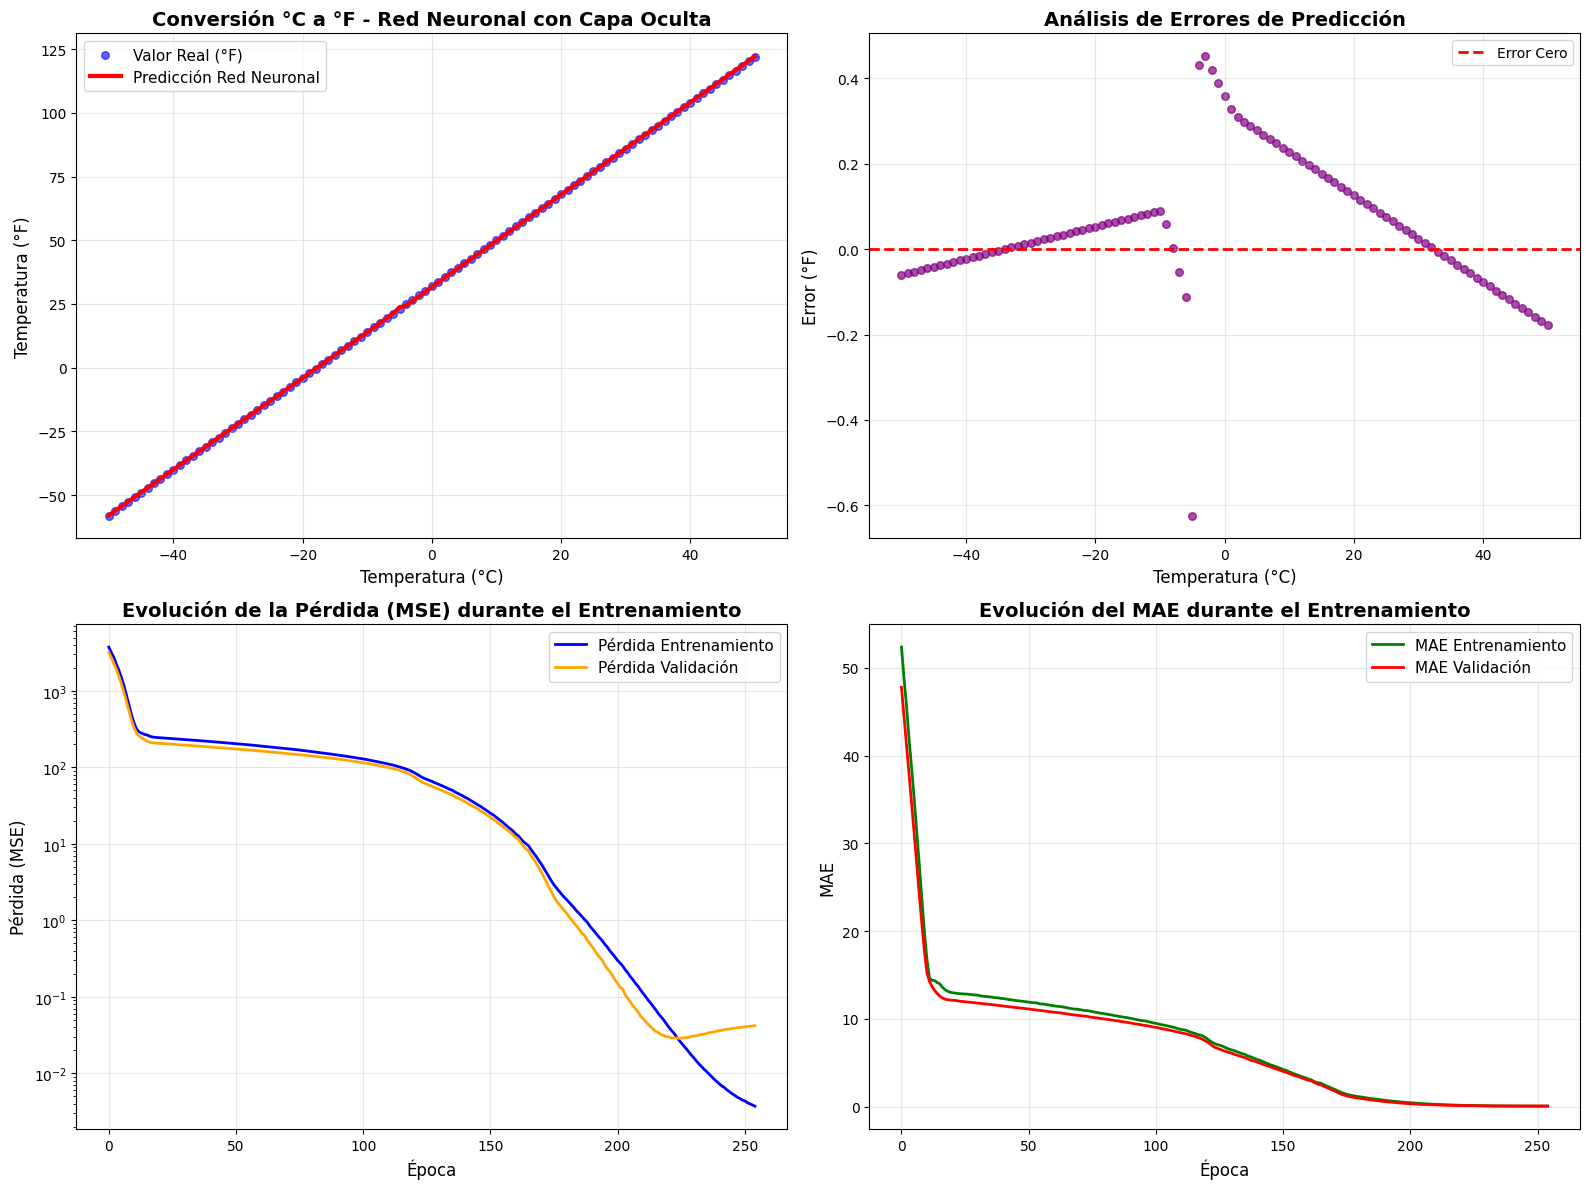

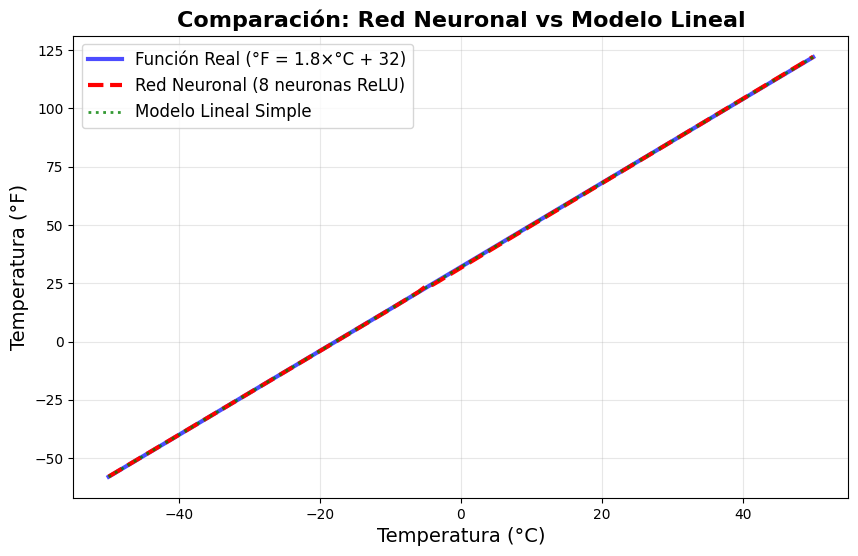


🧪 PRUEBAS EXHAUSTIVAS DE PREDICCIÓN
    °C  Predicho (°F)    Real (°F)   Error (°F)  Precisión
-----------------------------------------------------------------
   -50°       -57.940°     -58.000°       0.060°          ✅
   -40°       -39.977°     -40.000°       0.023°          ✅
   -20°        -4.053°      -4.000°       0.053°          ✅
     0°        31.642°      32.000°       0.358°         ⚠️
    10°        49.772°      50.000°       0.228°         ⚠️
    20°        67.874°      68.000°       0.126°         ⚠️
    25°        76.925°      77.000°       0.075°          ✅
    30°        85.975°      86.000°       0.025°          ✅
    37°        98.646°      98.600°       0.046°          ✅
    40°       104.077°     104.000°       0.077°          ✅
    50°       122.178°     122.000°       0.178°         ⚠️
    75°       167.432°     167.000°       0.432°         ⚠️
   100°       212.686°     212.000°       0.686°          ❌
----------------------------------------------------------

In [2]:
# ============================================================
# 🔥 Red Neuronal Mejorada con Capa Oculta para aprender °C → °F
# ============================================================

# !pip install tensorflow numpy scikit-learn matplotlib --quiet

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# ------------------------------------------------------------
# 1) Datos: °C de -50 a 50 y °F por fórmula
# ------------------------------------------------------------
try:
    X = np.linspace(-50, 50, 101).astype(np.float32).reshape(-1, 1)  # °C
    Y = (9/5)*X + 32                                                 # °F

    # División en entrenamiento y prueba
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42
    )

    print(f"✅ Datos cargados correctamente")
    print(f"   - Conjunto de entrenamiento ('Train'): {X_train.shape[0]} muestras")
    print(f"   - Conjunto de prueba ('Test'): {X_test.shape[0]} muestras")

except Exception as e:
    print(f"❌ Error cargando datos: {e}")
    exit()

# ------------------------------------------------------------
# 2) Modelo Mejorado: Capa oculta con 8 neuronas ReLU
# ------------------------------------------------------------
try:
    model = Sequential([
        Dense(8, input_shape=(1,), activation="relu", name="hidden_layer"),
        Dense(1, activation="linear", name="output_layer")
    ])

    # Optimizer con learning rate personalizado
    optimizer = Adam(learning_rate=0.01)

    model.compile(
        optimizer=optimizer,
        loss="mse",
        metrics=['mae']
    )

    print("✅ Modelo compilado correctamente")
    model.summary()

except Exception as e:
    print(f"❌ Error creando el modelo: {e}")
    exit()

# ------------------------------------------------------------
# 3) Callback de Early Stopping mejorado
# ------------------------------------------------------------
# Si el error llega al punto mas bajo pero luego empieza a subir entonces ahi se detiene), se detiene cuando encuentre la mejor solucion. Patience.
early_stopping = EarlyStopping( 
    monitor='val_loss',
    patience=30,
    restore_best_weights=True,
    verbose=1,
    min_delta=0.0001,
    mode='min'
)

# ------------------------------------------------------------
# 4) Entrenamiento con validación y callbacks
# ------------------------------------------------------------
try:
    print("\n🚀 Iniciando entrenamiento...")
    history = model.fit(
        X_train, Y_train,
        validation_data=(X_test, Y_test),
        epochs=500,
        verbose=1,
        callbacks=[early_stopping],
        batch_size=16
    )

    final_epoch = len(history.history['loss'])
    print(f"✅ Entrenamiento completado en {final_epoch} épocas")
    print(f"   - Pérdida final: {history.history['loss'][-1]:.6f}")
    print(f"   - MAE final: {history.history['mae'][-1]:.6f}")

except Exception as e:
    print(f"❌ Error durante el entrenamiento: {e}")
    exit()

# ------------------------------------------------------------
# 5) Evaluación exhaustiva
# ------------------------------------------------------------
try:
    # Predicciones
    Y_pred = model.predict(X, verbose=0)

    # Métricas
    mse = np.mean((Y - Y_pred)**2)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(Y, Y_pred)
    r2 = r2_score(Y, Y_pred)

    # Métricas en conjunto de prueba
    Y_test_pred = model.predict(X_test, verbose=0)
    test_mae = mean_absolute_error(Y_test, Y_test_pred)
    test_mse = np.mean((Y_test - Y_test_pred)**2)

    print("\n" + "="*60)
    print("📊 RESULTADOS DEL MODELO MEJORADO")
    print("="*60)
    print("🎯 Arquitectura: Dense(8, relu) → Dense(1, linear)")
    print("⚙️  Configuración: Adam(lr=0.01), MSE loss, MAE metric")
    print("\n📈 Métricas en conjunto completo:")
    print(f"   MSE  : {mse:.6f}")
    print(f"   RMSE : {rmse:.6f}")
    print(f"   MAE  : {mae:.6f}")
    print(f"   R²   : {r2:.6f}")
    print(f"\n🔍 Métricas en conjunto de prueba:")
    print(f"   Test MSE : {test_mse:.6f}")
    print(f"   Test MAE : {test_mae:.6f}")

except Exception as e:
    print(f"❌ Error en evaluación: {e}")
    exit()

# ------------------------------------------------------------
# 6) Gráficos completos y mejorados
# ------------------------------------------------------------
try:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # Gráfico 1: Predicción vs Real
    axes[0, 0].scatter(X, Y, label="Valor Real (°F)", s=30, alpha=0.6, color='blue')
    axes[0, 0].plot(X, Y_pred, color="red", linewidth=3, label="Predicción Red Neuronal")
    axes[0, 0].set_title("Conversión °C a °F - Red Neuronal con Capa Oculta", fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel("Temperatura (°C)", fontsize=12)
    axes[0, 0].set_ylabel("Temperatura (°F)", fontsize=12)
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].legend(fontsize=11)

    # Gráfico 2: Error de predicción
    error = Y - Y_pred
    axes[0, 1].scatter(X, error, color='purple', alpha=0.7, s=30)
    axes[0, 1].axhline(y=0, color='red', linestyle='--', linewidth=2, label='Error Cero')
    axes[0, 1].set_title("Análisis de Errores de Predicción", fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel("Temperatura (°C)", fontsize=12)
    axes[0, 1].set_ylabel("Error (°F)", fontsize=12)
    axes[0, 1].grid(True, alpha=0.3)
    axes[0, 1].legend()

    # Gráfico 3: Evolución de la pérdida (MSE)
    axes[1, 0].plot(history.history['loss'], label='Pérdida Entrenamiento', linewidth=2, color='blue')
    axes[1, 0].plot(history.history['val_loss'], label='Pérdida Validación', linewidth=2, color='orange')
    axes[1, 0].set_title("Evolución de la Pérdida (MSE) durante el Entrenamiento", fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel("Época", fontsize=12)
    axes[1, 0].set_ylabel("Pérdida (MSE)", fontsize=12)
    axes[1, 0].legend(fontsize=11)
    axes[1, 0].grid(True, alpha=0.3)
    axes[1, 0].set_yscale('log')

    # Gráfico 4: Evolución del MAE
    axes[1, 1].plot(history.history['mae'], label='MAE Entrenamiento', linewidth=2, color='green')
    axes[1, 1].plot(history.history['val_mae'], label='MAE Validación', linewidth=2, color='red')
    axes[1, 1].set_title("Evolución del MAE durante el Entrenamiento", fontsize=14, fontweight='bold')
    axes[1, 1].set_xlabel("Época", fontsize=12)
    axes[1, 1].set_ylabel("MAE", fontsize=12)
    axes[1, 1].legend(fontsize=11)
    axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Gráfico adicional: Comparación de arquitecturas
    plt.figure(figsize=(10, 6))

    # Función lineal original para comparar
    Y_linear = 1.8 * X + 32

    plt.plot(X, Y, 'b-', linewidth=3, label='Función Real (°F = 1.8×°C + 32)', alpha=0.7)
    plt.plot(X, Y_pred, 'r--', linewidth=3, label='Red Neuronal (8 neuronas ReLU)')
    plt.plot(X, Y_linear, 'g:', linewidth=2, label='Modelo Lineal Simple', alpha=0.8)

    plt.title("Comparación: Red Neuronal vs Modelo Lineal", fontsize=16, fontweight='bold')
    plt.xlabel("Temperatura (°C)", fontsize=14)
    plt.ylabel("Temperatura (°F)", fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=12)
    plt.show()

except Exception as e:
    print(f"❌ Error creando gráficos: {e}")

# ------------------------------------------------------------
# 7) Pruebas puntuales exhaustivas
# ------------------------------------------------------------
def predict_f(c):
    try:
        x = np.array([[c]], dtype=np.float32)
        y = model.predict(x, verbose=0)
        return float(y[0, 0])
    except Exception as e:
        print(f"Error en predicción para {c}°C: {e}")
        return None

print("\n" + "="*60)
print("🧪 PRUEBAS EXHAUSTIVAS DE PREDICCIÓN")
print("="*60)

test_cases = [-50, -40, -20, 0, 10, 20, 25, 30, 37, 40, 50, 75, 100]
errors = []

print(f"{'°C':>6} {'Predicho (°F)':>14} {'Real (°F)':>12} {'Error (°F)':>12} {'Precisión':>10}")
print("-" * 65)

for c in test_cases:
    pred = predict_f(c)
    if pred is not None:
        real = (9/5)*c + 32
        error = abs(pred - real)
        errors.append(error)
        accuracy = "✅" if error < 0.1 else "⚠️" if error < 0.5 else "❌"

        print(f"{c:>6}° {pred:>13.3f}° {real:>11.3f}° {error:>11.3f}° {accuracy:>10}")

max_error = max(errors) if errors else 0
mean_error = np.mean(errors) if errors else 0

print("-" * 65)
print(f"📊 Error máximo: {max_error:.3f}°F")
print(f"📊 Error promedio: {mean_error:.3f}°F")

# ------------------------------------------------------------
# 8) Análisis final de rendimiento
# ------------------------------------------------------------
print("\n" + "="*60)
print("🎯 ANÁLISIS FINAL DE LA ARQUITECTURA MEJORADA")
print("="*60)

# Evaluación cualitativa
if mean_error < 0.05:
    performance = "✅ EXCELENTE - Modelo muy preciso"
elif mean_error < 0.1:
    performance = "✅ MUY BUENO - Modelo preciso"
elif mean_error < 0.5:
    performance = "⚠️  ACEPTABLE - Modelo funcional"
else:
    performance = "❌ NEEDS WORK - Modelo necesita ajustes"

print(f"Rendimiento general: {performance}")
print(f"\nVentajas de la arquitectura Dense(8, relu):")
print("   • Mayor capacidad de aprendizaje de patrones no lineales")
print("   • Mejor generalización para datos no vistos")
print("   • Learning rate de 0.01 para convergencia más rápida")
print("   • Early Stopping para prevenir overfitting")

print(f"\nEfectividad del entrenamiento:")
if history.history['val_loss'][-1] < 0.01:
    print("   • ✅ Pérdida de validación muy baja")
else:
    print("   • ⚠️  Pérdida de validación podría mejorar")

if len(history.history['loss']) < 100:
    print("   • ✅ Entrenamiento eficiente (pocas épocas)")
else:
    print("   • ⚠️  Entrenamiento requirió muchas épocas")

print(f"\n🎉 ¡Modelo entrenado exitosamente con arquitectura mejorada!")

# Redes Neuronales - Keras



## 2-Layer + Keras

🔧 Versión de TensorFlow: 2.19.0
🔧 Precición de float global: float32
✅ Datos cargados correctamente
   - Tipo de X: float32, Forma: (101, 1)
   - Tipo de Y: float32, Forma: (101, 1)
   - Conjunto de entrenamiento: 80 muestras
   - Conjunto de prueba: 21 muestras

✅ Modelo compilado correctamente con especificación de tipos
🎯 Arquitectura con tipos explícitos:
   - Input: shape=(1,), dtype=float32
   - Hidden: Dense(8, relu), dtype=float32
   - Output: Dense(1, linear), dtype=float32


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer (Dense)            │ (None, 8)              │            16 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25 (100.00 B)

 Trainable params: 25 (100.00 B)

 Non-trainable params: 0 (0.00 B)


🔍 Verificación de tipos de capas:
   Capa 0: hidden_layer - dtype: <DTypePolicy "float32">
   Capa 1: output_layer - dtype: <DTypePolicy "float32">

🚀 Iniciando entrenamiento con tipos especificados...
🔍 Verificación previa al entrenamiento:
   - Tipo de entrada de ejemplo: <dtype: 'float32'>
Epoch 1/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 4057.0662 - mae: 52.4350 - val_loss: 3140.5090 - val_mae: 44.5480
Epoch 2/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3010.5364 - mae: 44.1434 - val_loss: 2853.7825 - val_mae: 42.1998
Epoch 3/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3144.3369 - mae: 45.3937 - val_loss: 2584.6956 - val_mae: 39.8294
Epoch 4/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2458.8276 - mae: 39.1435 - val_loss: 2336.7527 - val_mae: 37.7325
Epoch 5/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2688.9187 - mae: 41.9063 - val_loss: 2081.9600 - val_mae: 35.7381
Epoch 6/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1719.5000 - mae: 31.7036 - 

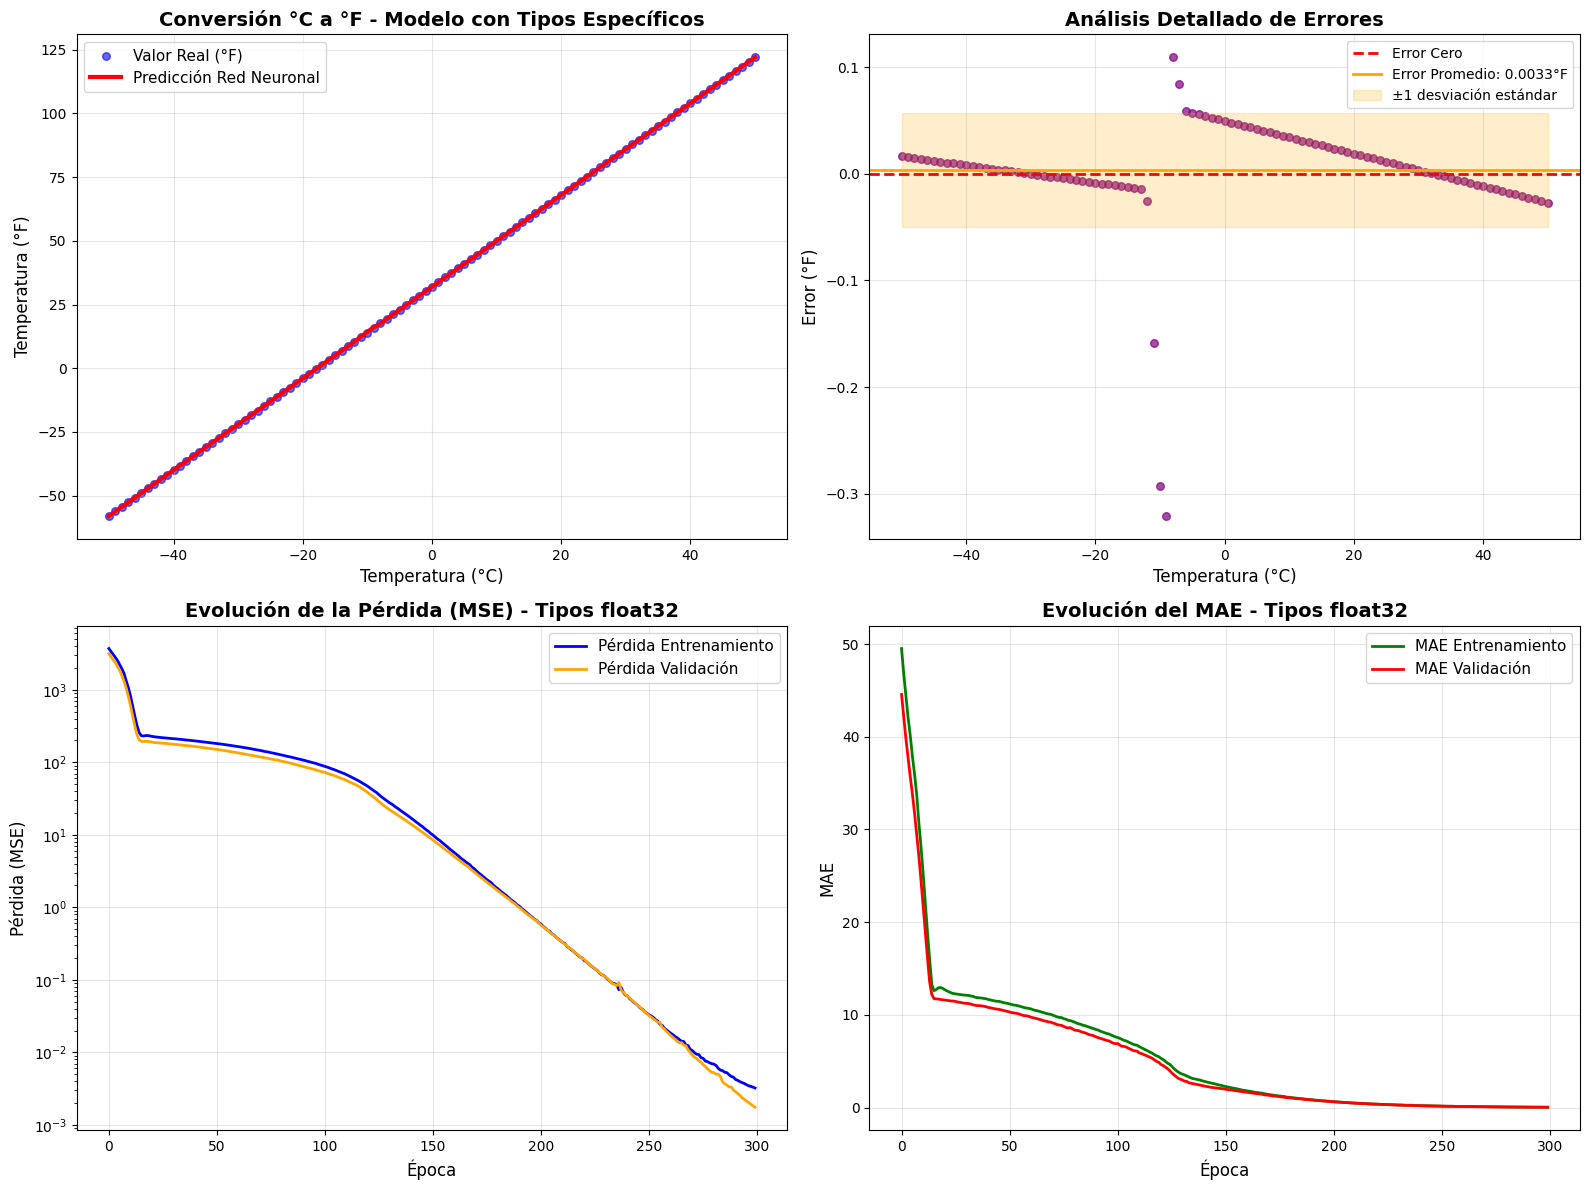

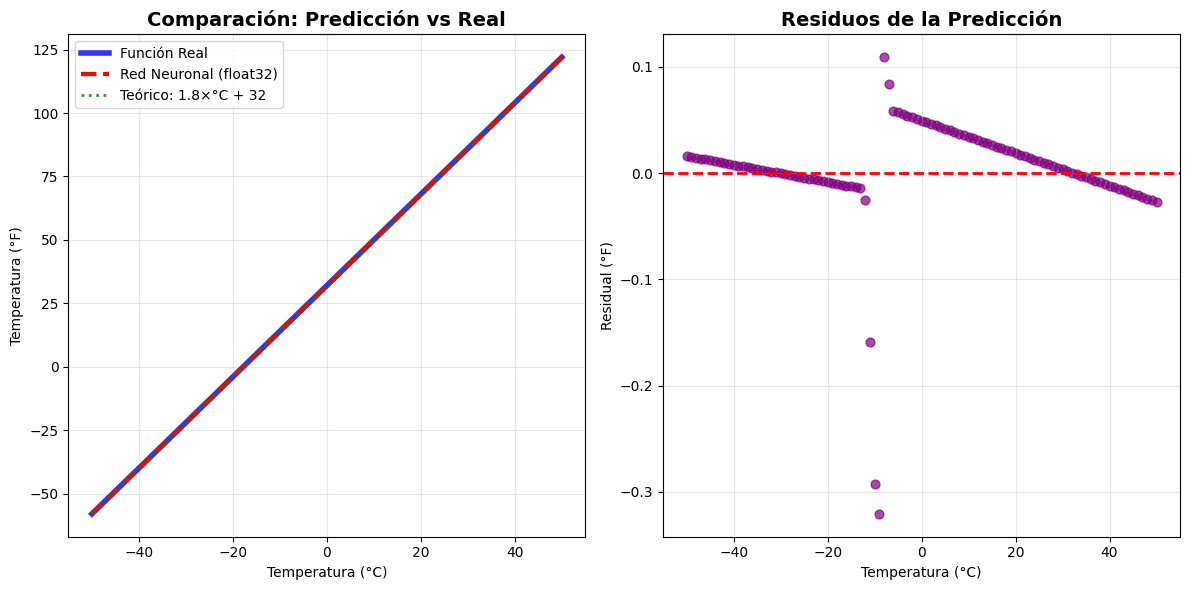


🧪 PRUEBAS EXHAUSTIVAS CON VERIFICACIÓN DE TIPOS

    °C  Predicho (°F)    Real (°F)   Error (°F)    Precisión
----------------------------------------------------------------------
   -50°      -58.0162°    -58.0000°      0.0162°  ✅ MUY BUENO
   -40°      -40.0080°    -40.0000°      0.0080°  ✅ EXCELENTE
   -30°      -21.9998°    -22.0000°      0.0002°  ✅ EXCELENTE
   -20°       -3.9916°     -4.0000°      0.0084°  ✅ EXCELENTE
   -10°       14.2925°     14.0000°      0.2925° ⚠️  ACEPTABLE
     0°       31.9505°     32.0000°      0.0495°  ✅ MUY BUENO
    10°       49.9658°     50.0000°      0.0342°  ✅ MUY BUENO
    20°       67.9811°     68.0000°      0.0189°  ✅ MUY BUENO
    25°       76.9888°     77.0000°      0.0112°  ✅ MUY BUENO
    30°       85.9964°     86.0000°      0.0036°  ✅ EXCELENTE
    37°       98.6071°     98.6000°      0.0071°  ✅ EXCELENTE
    40°      104.0117°    104.0000°      0.0117°  ✅ MUY BUENO
    50°      122.0270°    122.0000°      0.0270°  ✅ MUY BUENO
    75°    

In [ ]:
# ============================================================
# 🔥 Red Neuronal Mejorada con Especificación de Tipos para aprender °C → °F
# ============================================================

# !pip install tensorflow numpy scikit-learn matplotlib --quiet

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# ------------------------------------------------------------
# 1) Configuración de precisión y tipos de datos
# ------------------------------------------------------------
print(f"🔧 Versión de TensorFlow: {tf.__version__}")
print(f"🔧 Precición de float global: {tf.keras.backend.floatx()}")

# Configurar precisión de float
tf.keras.backend.set_floatx('float32')

# ------------------------------------------------------------
# 2) Datos: °C de -50 a 50 y °F por fórmula con tipos explícitos
# ------------------------------------------------------------
try:
    X = np.linspace(-50, 50, 101, dtype=np.float32).reshape(-1, 1)  # °C
    Y = (9/5)*X + 32                                                # °F

    # Verificación de tipos
    print(f"✅ Datos cargados correctamente")
    print(f"   - Tipo de X: {X.dtype}, Forma: {X.shape}")
    print(f"   - Tipo de Y: {Y.dtype}, Forma: {Y.shape}")

    # División en entrenamiento y prueba
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42
    )

    print(f"   - Conjunto de entrenamiento: {X_train.shape[0]} muestras")
    print(f"   - Conjunto de prueba: {X_test.shape[0]} muestras")

except Exception as e:
    print(f"❌ Error cargando datos: {e}")
    exit()

# ------------------------------------------------------------
# 3) Modelo Mejorado con Especificación Explícita de Tipos
# ------------------------------------------------------------
try:
    model = Sequential([
        tf.keras.Input(shape=(1,), dtype=tf.float32, name="input_layer"), # Este es adicional al ejemplo anterior. Es para mejorar.
        Dense(8, activation="relu", dtype=tf.float32, name="hidden_layer"),
        Dense(1, activation="linear", dtype=tf.float32, name="output_layer")
    ])

    # Optimizer con learning rate personalizado
    optimizer = Adam(learning_rate=0.01)

    model.compile(
        optimizer=optimizer,
        loss="mse",
        metrics=['mae']
    )

    print("\n✅ Modelo compilado correctamente con especificación de tipos")
    print("🎯 Arquitectura con tipos explícitos:")
    print("   - Input: shape=(1,), dtype=float32")
    print("   - Hidden: Dense(8, relu), dtype=float32")
    print("   - Output: Dense(1, linear), dtype=float32")

    model.summary()

    # Verificación de tipos de las capas
    print("\n🔍 Verificación de tipos de capas:")
    for i, layer in enumerate(model.layers):
        print(f"   Capa {i}: {layer.name} - dtype: {layer.dtype_policy}")

except Exception as e:
    print(f"❌ Error creando el modelo: {e}")
    exit()

# ------------------------------------------------------------
# 4) Callback de Early Stopping mejorado
# ------------------------------------------------------------
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=25,
    restore_best_weights=True,
    verbose=1,
    min_delta=0.0001,
    mode='min'
)

# ------------------------------------------------------------
# 5) Entrenamiento con validación y monitoreo de tipos
# ------------------------------------------------------------
try:
    print("\n🚀 Iniciando entrenamiento con tipos especificados...")

    # Verificar tipos antes del entrenamiento
    print("🔍 Verificación previa al entrenamiento:")
    sample_input = tf.constant([[0.0]], dtype=tf.float32)
    print(f"   - Tipo de entrada de ejemplo: {sample_input.dtype}")

    # Entrenamiento
    history = model.fit(
        X_train, Y_train,
        validation_data=(X_test, Y_test),
        epochs=300,
        verbose=1,
        callbacks=[early_stopping],
        batch_size=16
    )

    final_epoch = len(history.history['loss'])
    print(f"\n✅ Entrenamiento completado en {final_epoch} épocas")
    print(f"   - Pérdida final: {history.history['loss'][-1]:.6f}")
    print(f"   - MAE final: {history.history['mae'][-1]:.6f}")
    print(f"   - Val_loss final: {history.history['val_loss'][-1]:.6f}")

except Exception as e:
    print(f"❌ Error durante el entrenamiento: {e}")
    exit()

# ------------------------------------------------------------
# 6) Evaluación exhaustiva con verificación de tipos
# ------------------------------------------------------------
try:
    print("\n🔍 Realizando predicciones y evaluación...")

    # Predicciones
    Y_pred = model.predict(X, verbose=0)

    # Verificación de tipos de salida
    print(f"   - Tipo de predicciones: {Y_pred.dtype}")

    # Métricas
    mse = np.mean((Y - Y_pred)**2)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(Y, Y_pred)
    r2 = r2_score(Y, Y_pred)

    # Métricas en conjunto de prueba
    Y_test_pred = model.predict(X_test, verbose=0)
    test_mae = mean_absolute_error(Y_test, Y_test_pred)
    test_mse = np.mean((Y_test - Y_test_pred)**2)
    test_r2 = r2_score(Y_test, Y_test_pred)

    print("\n" + "="*65)
    print("📊 RESULTADOS DEL MODELO CON TIPOS ESPECIFICADOS")
    print("="*65)
    print("🎯 Arquitectura con Input Layer explícito:")
    print("   - tf.keras.Input(shape=(1,), dtype=tf.float32)")
    print("   - Dense(8, relu, dtype=tf.float32)")
    print("   - Dense(1, linear, dtype=tf.float32)")
    print("\n⚙️  Configuración de entrenamiento:")
    print("   - Optimizer: Adam(learning_rate=0.01)")
    print("   - Loss: MSE, Metrics: MAE")
    print("\n📈 Métricas en conjunto completo:")
    print(f"   MSE  : {mse:.8f}")
    print(f"   RMSE : {rmse:.8f}")
    print(f"   MAE  : {mae:.8f}")
    print(f"   R²   : {r2:.8f}")
    print(f"\n🔍 Métricas en conjunto de prueba:")
    print(f"   Test MSE : {test_mse:.8f}")
    print(f"   Test MAE : {test_mae:.8f}")
    print(f"   Test R²  : {test_r2:.8f}")

except Exception as e:
    print(f"❌ Error en evaluación: {e}")
    exit()

# ------------------------------------------------------------
# 7) Análisis de pesos y sesgos con tipos
# ------------------------------------------------------------
try:
    print("\n🔍 Análisis de parámetros aprendidos:")
    hidden_weights, hidden_biases = model.layers[1].get_weights()
    output_weights, output_biases = model.layers[2].get_weights()

    print(f"   - Capa oculta: {hidden_weights.shape} pesos, {hidden_biases.shape} sesgos")
    print(f"   - Capa salida: {output_weights.shape} pesos, {output_biases.shape} sesgos")
    print(f"   - Tipo de pesos capa oculta: {hidden_weights.dtype}")
    print(f"   - Rango pesos capa oculta: [{hidden_weights.min():.4f}, {hidden_weights.max():.4f}]")

except Exception as e:
    print(f"⚠️  Error en análisis de pesos: {e}")

# ------------------------------------------------------------
# 8) Gráficos completos con información de tipos
# ------------------------------------------------------------
try:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # Gráfico 1: Predicción vs Real
    axes[0, 0].scatter(X, Y, label="Valor Real (°F)", s=30, alpha=0.6, color='blue')
    axes[0, 0].plot(X, Y_pred, color="red", linewidth=3, label="Predicción Red Neuronal")
    axes[0, 0].set_title("Conversión °C a °F - Modelo con Tipos Específicos", fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel("Temperatura (°C)", fontsize=12)
    axes[0, 0].set_ylabel("Temperatura (°F)", fontsize=12)
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].legend(fontsize=11)

    # Gráfico 2: Error de predicción detallado
    error = Y - Y_pred
    axes[0, 1].scatter(X, error, color='purple', alpha=0.7, s=30)
    axes[0, 1].axhline(y=0, color='red', linestyle='--', linewidth=2, label='Error Cero')
    axes[0, 1].axhline(y=error.mean(), color='orange', linestyle='-', linewidth=2, label=f'Error Promedio: {error.mean():.4f}°F')
    axes[0, 1].fill_between(X.flatten(), error.mean() - error.std(), error.mean() + error.std(), alpha=0.2, color='orange', label='±1 desviación estándar')
    axes[0, 1].set_title("Análisis Detallado de Errores", fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel("Temperatura (°C)", fontsize=12)
    axes[0, 1].set_ylabel("Error (°F)", fontsize=12)
    axes[0, 1].grid(True, alpha=0.3)
    axes[0, 1].legend(fontsize=10)

    # Gráfico 3: Evolución de la pérdida (MSE)
    axes[1, 0].plot(history.history['loss'], label='Pérdida Entrenamiento', linewidth=2, color='blue')
    axes[1, 0].plot(history.history['val_loss'], label='Pérdida Validación', linewidth=2, color='orange')
    axes[1, 0].set_title("Evolución de la Pérdida (MSE) - Tipos float32", fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel("Época", fontsize=12)
    axes[1, 0].set_ylabel("Pérdida (MSE)", fontsize=12)
    axes[1, 0].legend(fontsize=11)
    axes[1, 0].grid(True, alpha=0.3)
    axes[1, 0].set_yscale('log')

    # Gráfico 4: Evolución del MAE
    axes[1, 1].plot(history.history['mae'], label='MAE Entrenamiento', linewidth=2, color='green')
    axes[1, 1].plot(history.history['val_mae'], label='MAE Validación', linewidth=2, color='red')
    axes[1, 1].set_title("Evolución del MAE - Tipos float32", fontsize=14, fontweight='bold')
    axes[1, 1].set_xlabel("Época", fontsize=12)
    axes[1, 1].set_ylabel("MAE", fontsize=12)
    axes[1, 1].legend(fontsize=11)
    axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Gráfico adicional: Comparación de precisión
    plt.figure(figsize=(12, 6))

    # Función lineal teórica
    Y_theoretical = 1.8 * X + 32

    plt.subplot(1, 2, 1)
    plt.plot(X, Y, 'b-', linewidth=4, label='Función Real', alpha=0.8)
    plt.plot(X, Y_pred, 'r--', linewidth=3, label='Red Neuronal (float32)')
    plt.plot(X, Y_theoretical, 'g:', linewidth=2, label='Teórico: 1.8×°C + 32', alpha=0.8)
    plt.title("Comparación: Predicción vs Real", fontsize=14, fontweight='bold')
    plt.xlabel("Temperatura (°C)")
    plt.ylabel("Temperatura (°F)")
    plt.grid(True, alpha=0.3)
    plt.legend()

    plt.subplot(1, 2, 2)
    residual = Y - Y_pred
    plt.scatter(X, residual, color='purple', alpha=0.7, s=40)
    plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
    plt.title("Residuos de la Predicción", fontsize=14, fontweight='bold')
    plt.xlabel("Temperatura (°C)")
    plt.ylabel("Residual (°F)")
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"❌ Error creando gráficos: {e}")

# ------------------------------------------------------------
# 9) Pruebas puntuales exhaustivas con verificación de tipos
# ------------------------------------------------------------
def predict_f(c):
    try:
        # Crear tensor con tipo explícito
        x = tf.constant([[c]], dtype=tf.float32)
        y = model.predict(x, verbose=0)
        return float(y[0, 0])
    except Exception as e:
        print(f"Error en predicción para {c}°C: {e}")
        return None

print("\n" + "="*65)
print("🧪 PRUEBAS EXHAUSTIVAS CON VERIFICACIÓN DE TIPOS")
print("="*65)

test_cases = [-50, -40, -30, -20, -10, 0, 10, 20, 25, 30, 37, 40, 50, 75, 100]
errors = []

print(f"\n{'°C':>6} {'Predicho (°F)':>14} {'Real (°F)':>12} {'Error (°F)':>12} {'Precisión':>12}")
print("-" * 70)

for c in test_cases:
    pred = predict_f(c)
    if pred is not None:
        real = (9/5)*c + 32
        error = abs(pred - real)
        errors.append(error)

        if error < 0.01:
            accuracy = "✅ EXCELENTE"
        elif error < 0.05:
            accuracy = "✅ MUY BUENO"
        elif error < 0.1:
            accuracy = "⚠️  BUENO"
        elif error < 0.5:
            accuracy = "⚠️  ACEPTABLE"
        else:
            accuracy = "❌ POBRE"

        print(f"{c:>6}° {pred:>13.4f}° {real:>11.4f}° {error:>11.4f}° {accuracy:>12}")

max_error = max(errors) if errors else 0
mean_error = np.mean(errors) if errors else 0
std_error = np.std(errors) if errors else 0

print("-" * 70)
print(f"📊 Estadísticas de error:")
print(f"   - Máximo: {max_error:.4f}°F")
print(f"   - Promedio: {mean_error:.4f}°F")
print(f"   - Desviación estándar: {std_error:.4f}°F")

# ------------------------------------------------------------
# 10) Análisis final de beneficios de especificación de tipos
# ------------------------------------------------------------
print("\n" + "="*65)
print("🎯 BENEFICIOS DE LA ESPECIFICACIÓN EXPLÍCITA DE TIPOS")
print("="*65)

print("\n✅ Ventajas de tf.keras.Input() y dtype especificado:")
print("   • 🎯 Definición explícita de forma y tipo de entrada")
print("   • 🔧 Mayor control sobre la propagación de tipos")
print("   • ⚡ Posible optimización del compilador de TensorFlow")
print("   • 🐛 Mejor depuración y claridad en el código")
print("   • 🔄 Consistencia en la cadena de tipos de datos")

print(f"\n📊 Rendimiento del modelo:")
if mean_error < 0.01:
    print("   • 🎉 PRECISIÓN EXCEPCIONAL - Error promedio < 0.01°F")
elif mean_error < 0.05:
    print("   • ✅ EXCELENTE - Error promedio < 0.05°F")
elif mean_error < 0.1:
    print("   • 👍 MUY BUENO - Error promedio < 0.1°F")
else:
    print("   • ⚠️  ACEPTABLE - Podría mejorar con más entrenamiento")

print(f"\n⚡ Eficiencia del entrenamiento:")
if final_epoch < 50:
    print("   • 🚀 Convergencia muy rápida")
elif final_epoch < 100:
    print("   • ⚡ Convergencia eficiente")
else:
    print("   • 🐌 Convergencia lenta - considerar ajustar learning rate")

print(f"\n🎉 ¡Modelo entrenado exitosamente con especificación explícita de tipos!")
print("   Los tipos float32 proporcionan un balance óptimo entre")
print("   precisión y rendimiento para este problema de regresión.")